# **LIMPIEZA DE TEXTO**

In [ ]:
pip install python-dotenv
pip install openai
pip install spacy unidecode
python -m spacy download es_core_news_sm
pip install fonttools
pip install -q textblob
pip install spacy
python -m spacy download es_core_news_sm
pip install wordcloud
pip install ufal.udpipe
pip install pyspellchecker
#!wget https://lindat.mff.cuni.cz/repository/xmlui/bitstream/handle/11234/1-3131/udpipe-ud-2.5-191206.zip
#!unzip udpipe-ud-2.5-191206.zip
wget https://lindat.mff.cuni.cz/repository/xmlui/bitstream/handle/11234/1-3131/spanish-gsd-ud-2.5-191206.udpipe
python -m spacy download es_core_news_sm
python -m spacy download es_core_news_md
pip install igraph

In [ ]:
from textblob import TextBlob
import spacy
nlp = spacy.load("es_core_news_sm")
from dotenv import load_dotenv
import openai
import os
import re
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import networkx as nx
import matplotlib.pyplot as plt
import nltk
import numpy as np
nltk.download('stopwords')
nltk.download('words')
import pandas as pd
import unicodedata
import nltk
nltk.download('punkt')
import random
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro, bartlett, pearsonr
import community
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import community
import subprocess
import pickle
import igraph as ig
import unidecode
from itertools import combinations
from collections import Counter
from google.colab import drive
from unidecode import unidecode
import math
import nltk
nltk.download('punkt_tab')
import spacy
from tqdm import tqdm
import matplotlib.pyplot as plt
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import unicodedata
nlp = spacy.load("es_core_news_sm")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Mounted at /content/drive


In [3]:
#FUNCIONES DE LIMPIEZA DE TEXTO

def limpiar_texto(texto):
    # Convertir texto a minúsculas
    texto = texto.lower()

    # Quitar caracteres especiales y números
    texto = re.sub(r'[^a-zA-ZñÑáéíóúÁÉÍÓÚó\s]', '', texto)
    texto = ''.join((c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn'))

    return texto

def quitar_stopwords(texto):
    # Tokenizar el texto
    tokens = word_tokenize(texto)

    # Quitar stopwords
    texto_limpio = [word for word in tokens if word not in stop_words]

    return ' '.join(texto_limpio)


def generar_skipgramas(texto, n=2, k=2):
    tokens = word_tokenize(texto)
    skipgramas = []

    # Generar todos los pares (w_i, w_j) donde 1 ≤ j - i ≤ k + 1
    for i in range(len(tokens)):
        for j in range(i + 1, min(i + k + 2, len(tokens))):
            skipgramas.append((tokens[i], tokens[j]))

    return skipgramas


def eliminar_palabras_cortas(texto):
    excepciones = {"up", "fé", "fe"}  # palabras que no queremos eliminar como UP(unión patriótica) y fe
    palabras = texto.split()
    palabras_filtradas = [
        palabra for palabra in palabras
        if len(palabra) > 2 or palabra.lower() in excepciones
    ]
    texto_filtrado = ' '.join(palabras_filtradas)
    return texto_filtrado


In [ ]:
carpeta = '/Casos_JEP/caso_02'
contenido_archivos = []
for archivo in os.listdir(carpeta):
    if archivo.endswith('.txt') and 'Rueda de prensa' not in archivo:
        ruta_archivo = os.path.join(carpeta, archivo)
        with open(ruta_archivo, 'r', encoding='utf-8') as f:
            contenido_archivos.append(f.read())
contenido_combinado= '\n'.join(contenido_archivos)

len(contenido_combinado)
texto=contenido_combinado

In [ ]:
#lematizar palabras reconocidas:
lematizaciones = {}
with open('/Casos_JEP/lematizacion.txt', 'r', encoding='utf-8') as f:
    for linea in f:
        if ':' in linea:
            palabra, lema = linea.strip().split(':')
            lematizaciones[palabra.strip()] = lema.strip()

palabras = texto.split()
palabras_lematizadas = [lematizaciones.get(palabra.lower(), palabra) for palabra in palabras]
texto_lematizado = ' '.join(palabras_lematizadas) #Obtenemos el texto nuevamente.

print("Texto lematizado:")
print(texto_lematizado)

#Eliminar palabras de uno o dos caracteres:
texto_filtrado=eliminar_palabras_cortas(texto_lematizado)
texto_filtrado

##Tokenizar
tokens = nltk.word_tokenize(texto_filtrado, language="spanish")
texto_para_udpipe = " ".join(tokens)


Texto lematizado:
al al al Buenos días para todos y para todas Mi nombre es Erica Yazmín garzón daa soy profesional especializada grado 33 de la sala de reconocimiento y ejercer la secretaría eh adoc de la presente diligencia de recepción de testimonio convocada mediante auto srb bit 105 del 31 de mayo del 2024 en el marco del caso 02 de la sala de reconocimiento de verdad y de responsabilidad que Investiga la situación territorial de tumaco ricaurte y barbacoas siendo las 99:05 de la mañana del 18 de junio del 2024 se declarar instalada esta diligencia de recepción de testimonio de la jurisdicción especial para la paz presidida por la magistrada Ávila eh de la sala de reconocimiento verdad y responsabilidad y determinación de hacer y conductas e del relatora del caso 02 para los efectos de la siguiente diligencia acude en calidad de testigo el señor Raúl Delgado Guerrero y como intervinientes especiales los representantes de las víctima y la delegada de la procuraduría general de la n

# **LEMATIZACIÓN Y CORRECCIÓN PREVIA**

In [6]:
# cargar modelo español solo con lematización
nlp = spacy.load("es_core_news_md", disable=["parser","ner"])
excepciones = {"soldado", "voluntario"}

def lematizar_en_bloques(tokens, bloque_size=10000):
    lemas = []
    for i in tqdm(range(0, len(tokens), bloque_size)):
        bloque = tokens[i:i+bloque_size]
        docs = nlp.pipe(bloque, disable=["parser","ner"])
        for token_original, doc in zip(bloque, docs):
            token_spacy = doc[0]
            if token_original.lower() in excepciones:
                lemas.append(token_original.lower())
            else:
                lemas.append(token_spacy.lemma_)

    return lemas
lemas = lematizar_en_bloques(tokens, bloque_size=10000)
with open("solo_lemas.txt", "w", encoding="utf-8") as f:
    for lema in lemas:
        f.write(lema + "\n")

100%|██████████| 3/3 [00:05<00:00,  1.86s/it]


In [7]:
# reconstruir texto corrido a partir de los lemas
texto_lemas = " ".join(lemas)
with open("texto_lemas.txt", "w", encoding="utf-8") as f:
    f.write(texto_lemas)

# **CREAR DICC**

In [ ]:
# verificar si existen las palabras a través de un diccionario:
import re
from spellchecker import SpellChecker
spell = SpellChecker(language="es")

def limpiar_y_revisar(lemas):
    limpios = []
    typos = []

    for lema in lemas:
        palabra = lema.lower().strip()
        palabra = re.sub(r"[0-9]", "", palabra)
        if not palabra:
            continue
        if len(palabra) <= 2:
            continue
        if palabra in spell:
            limpios.append(palabra)
        else:
            typos.append(palabra)

    return limpios, typos

lemas_limpios, posibles_typos = limpiar_y_revisar(lemas)

print("Lemas válidos:", len(lemas_limpios))
print("Posibles typos:", len(posibles_typos))

Lemas válidos: 19764
Posibles typos: 2420


In [ ]:
# Primera depuración de las palabras identificadas como typo
print(sys.getdefaultencoding())

os.environ["OPENAI_API_KEY"] = ""
client = OpenAI()
PromptInicio = (
    "Utilizando la lista de palabras proporcionada a continuación, "
    "extrae únicamente las palabras que NO pertenecen al idioma español "
    "y que parecen errores o ruido de subtítulos automáticos. "
    "No marques como errores las palabras correctas en español, "
    "aunque sean poco frecuentes.\n\n[Inicio lista]\n"
)
PromptFinal = "\n[Fin lista]\n\nResponde únicamente con una lista de los posibles errores."

##revisar por bloques para optimizar:

def revisar_con_gpt(palabras, bloque_size=500):
    resultados = []
    n_bloques = math.ceil(len(palabras) / bloque_size)

    for i in range(n_bloques):
        bloque = palabras[i*bloque_size:(i+1)*bloque_size]
        lista_str = "\n".join(bloque)

        prompt = PromptInicio + lista_str + PromptFinal

        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "Eres un asistente lingüístico experto en español."},
                {"role": "user", "content": prompt}
            ],
            temperature=0
        )

        salida = response.choices[0].message.content.strip()
        resultados.append(salida)

        print(f"Bloque {i+1}/{n_bloques} procesado")

    return resultados

errores_detectados = revisar_con_gpt(posibles_typos, bloque_size=300)

print("\n".join(errores_detectados))

In [ ]:
# Cargar el archivo depurado previamente para depurarlo
uploaded = files.upload()
nombre_archivo = list(uploaded.keys())[0]
with open(nombre_archivo, "r", encoding="utf-8") as f:
    lineas = f.readlines()

# Quitamos "- "
lineas_limpias = [linea.lstrip("- ").strip() for linea in lineas]

# Segunda verificación de aquellas palabras que no existen para corregirlas:

print(sys.getdefaultencoding())
os.environ["OPENAI_API_KEY"] = ""
client = OpenAI()

# Prompt para corrección y lematización
PromptInicio_corr = (
    "A partir de la lista de palabras proporcionada a continuación, "
    "propón una corrección para cada palabra y redúcela a su raíz más pequeña (lema). "
    "Si la palabra no tiene significado o no se puede corregir, responde con 'NA'.\n\n"
    "[Inicio lista]\n")

PromptFinal_corr = (
    "\n[Fin lista]\n\n"
    "Responde únicamente en el formato:\n"
    "palabra_original - correccion")

def corregir_y_lematizar(palabras, bloque_size=300):
    resultados = []
    n_bloques = math.ceil(len(palabras) / bloque_size)

    for i in range(n_bloques):
        bloque = palabras[i*bloque_size:(i+1)*bloque_size]
        lista_str = "\n".join(bloque)

        prompt = PromptInicio_corr + lista_str + PromptFinal_corr

        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "Eres un asistente experto en lingüística y lematización del español."},
                {"role": "user", "content": prompt}
            ],
            temperature=0
        )

        salida = response.choices[0].message.content.strip()
        resultados.append(salida)

        print(f"Bloque {i+1}/{n_bloques} procesado")

    # Unir todos los bloques en un solo string
    texto_resultado = "\n".join(resultados)

    # Parsear a DataFrame
    pares = [line.strip() for line in texto_resultado.splitlines() if "-" in line]
    data = [line.split("-", 1) for line in pares]
    df = pd.DataFrame(data, columns=["original", "correccion"])
    df["original"] = df["original"].str.strip()
    df["correccion"] = df["correccion"].str.strip()

    return df
df_correcciones = corregir_y_lematizar(lineas_limpias, bloque_size=100)

print(df_correcciones)

# Guardar en un archivo
df_correcciones.to_csv("correcciones.csv", index=False, encoding="utf-8")
print("Archivo 'correcciones.csv' guardado")


# Guardar en TXT con el formato de corrección
with open("correcciones.txt", "w", encoding="utf-8") as f:
    for _, row in df_correcciones.iterrows():
        f.write(f"{row['original']} : {row['correccion']}\n")
files.download("correcciones.txt")


In [ ]:
# Remover palabras repetidas
print("Selecciona tu archivo .txt") #cargamos el ultimo archivo depurado:
uploaded = files.upload()
nombre_archivo = list(uploaded.keys())[0]
with open(nombre_archivo, "r", encoding="utf-8") as f:
    lineas = f.readlines()
unicas = list(dict.fromkeys(lineas))
nombre_salida = "salida.txt"
with open(nombre_salida, "w", encoding="utf-8") as f:
    f.writelines(unicas)
print(f"Archivo limpio guardado como '{nombre_salida}'")
files.download(nombre_salida)

# **Limpieza y depuración de datos**

In [ ]:
#Limpieza de palabras que se categorizaron como typo
lematizaciones2 = {}
with open('/Casos_JEP/salida_02.txt', 'r', encoding='utf-8') as f:
    for linea in f:
        if ':' in linea:
            palabra, lema = linea.strip().split(':')
            lematizaciones2[palabra.strip()] = lema.strip()

#lematizar el texto generado antes

texto_lemas_dicc = []
for palabra in lemas:
    if palabra in lematizaciones2:
        if lematizaciones2[palabra] != "NA":
            texto_lemas_dicc.append(lematizaciones2[palabra])
        # si es "NA" no agregamos nada (se elimina)
    else:
        texto_lemas_dicc.append(palabra)  # si no está en el diccionario, se deja igual
texto_final = " ".join(texto_lemas_dicc)
with open("texto_final_dicc.txt", "w", encoding="utf-8") as f:
    f.write(texto_final)


In [ ]:
##cargar stopwords y lemas, depurar y normalizar para que esté todo en el mismo formato:
stop_words = set(stopwords.words('spanish'))

archivo_stopwords = '/Casos_JEP/stop_words_espanol.txt'
with open(archivo_stopwords, 'r', encoding='utf-8') as file:
    for line in file:
        word = line.strip()
        stop_words.add(word)

palabras_procesadas = []

def eliminar_acentos(palabra):
    return ''.join((c for c in unicodedata.normalize('NFD', palabra) if unicodedata.category(c) != 'Mn'))

with open(archivo_stopwords, 'r') as archivo:
    for linea in archivo:
        palabras = linea.split()
        for palabra in palabras:
            palabra_sin_acentos = eliminar_acentos(palabra.lower())
            palabras_procesadas.append(palabra_sin_acentos)
stop_words.update(palabras_procesadas)


#  Definir las rutas de tus archivos en Drive
ruta_palabras = "/Casos_JEP/palabras_no_validas.txt"
ruta_lemas ="/Casos_JEP/lemas_lemas.txt"

# 1. Leer archivo de palabras no válidas
with open(ruta_palabras, "r", encoding="utf-8") as f:
    palabras_no_validas = [line.strip() for line in f if line.strip()]

# 2. Leer archivo de lemas
lemas_set = set()
with open(ruta_lemas, "r", encoding="utf-8") as f:
    for line in f:
        if ":" in line:  # formato esperado: palabra : lema
            palabra, lema = line.strip().split(":")
            palabra = palabra.strip()
            lema = lema.strip()
            lemas_set.add(palabra)  # guardamos la parte izquierda (forma original

# Filtrar palabras no válidas
filtradas = [p for p in palabras_no_validas if p not in lemas_set]


In [ ]:
lematizaciones_final = {}
with open('/Casos_JEP/lemas_lemas.txt', 'r', encoding='utf-8') as f:
    for linea in f:
        if ':' in linea:
            palabra, lema = linea.strip().split(':')
            lematizaciones_final[palabra.strip()] = lema.strip()


##Normalizar las lematizaciones
def normalizar(texto):
    texto = texto.lower()
    texto = unicodedata.normalize("NFD", texto)
    texto = texto.encode("ascii", "ignore").decode("utf-8")
    return texto

lematizaciones_final = {}
with open('/Casos_JEP/lemas_lemas.txt', 'r', encoding='utf-8') as f:
    for linea in f:
        if ':' in linea:
            palabra, lema = linea.strip().split(':')
            palabra_norm = normalizar(palabra.strip())
            lema_norm = normalizar(lema.strip())
            lematizaciones_final[palabra_norm] = lema_norm

texto_final_limpio=limpiar_texto(texto_final)
palabras = texto_final_limpio.split()

# Reemplazar por lema si existe
palabras_lematizadas = [
    lematizaciones_final.get(palabra, palabra)  # busca la palabra, si no está deja la original
    for palabra in palabras
]

texto_lema = " ".join(palabras_lematizadas)
#print(texto_lema)

##eliminar las palabras stopwords iniciales:
palabras = texto_lema.split()
palabras_filtradas = [p for p in palabras if p not in filtradas]
texto_final = " ".join(palabras_filtradas)

# **GENERAR SKIPGRAMAS**

In [11]:
##eliminar términos con frecuencia de 1:
texto_sin_stopwords = quitar_stopwords(texto_final) #remover stopwords
tokens = word_tokenize(texto_sin_stopwords)
frec = Counter(tokens)
tokens_filtrados = [t for t in tokens if frec[t] > 1]
texto_sin_stopwords = " ".join(tokens_filtrados)

##Generar skipgramas
skipgramas = generar_skipgramas(texto_sin_stopwords, 2, 2)
##eliminar bucles:
skipgramas_sin_bucles = [b for b in skipgramas if b[0] != b[1]]
conteo = Counter(skipgramas_sin_bucles)
skipgramas = [b for b, f in conteo.items()
if f > 1
    for _ in range(f)]


In [ ]:
skipgramas[:10]

[('garzon', 'profesional'),
 ('garzon', 'profesional'),
 ('garzon', 'profesional'),
 ('garzon', 'grado'),
 ('garzon', 'grado'),
 ('garzon', 'reconocimiento'),
 ('garzon', 'reconocimiento'),
 ('profesional', 'grado'),
 ('profesional', 'grado'),
 ('profesional', 'grado')]

In [ ]:
from collections import Counter
skipgramas_contar = [' '.join(bigram) for bigram in skipgramas]
skipgramas_cuantos = Counter(skipgramas_contar )
top_10 = skipgramas_cuantos.most_common(10)
top_10

[('gobierno nacional', 73),
 ('cultivo ilicito', 46),
 ('aspersion glifosato', 37),
 ('sustituir voluntario', 29),
 ('erradicacion cultivo', 27),
 ('municipio tumaco', 25),
 ('departamento narino', 25),
 ('fuerza publico', 23),
 ('judicial victima', 23),
 ('representante victima', 22)]

In [18]:
palabras_a_eliminar = ['yo', 'el']
patron = r'\b(?:' + '|'.join(palabras_a_eliminar) + r')\b'

# Limpieza
skipgramas_limpio = []
for w1, w2 in skipgramas:
    nuevo_w1 = re.sub(patron, '', w1).strip()
    nuevo_w2 = re.sub(patron, '', w2).strip()
    nuevo_w1 = ' '.join(nuevo_w1.split())
    nuevo_w2 = ' '.join(nuevo_w2.split())
    skipgramas_limpio.append((nuevo_w1, nuevo_w2))
print(skipgramas_limpio)


[('garzon', 'profesional'), ('garzon', 'profesional'), ('garzon', 'profesional'), ('garzon', 'grado'), ('garzon', 'grado'), ('garzon', 'reconocimiento'), ('garzon', 'reconocimiento'), ('profesional', 'grado'), ('profesional', 'grado'), ('profesional', 'grado'), ('profesional', 'reconocimiento'), ('profesional', 'reconocimiento'), ('profesional', 'ejercer'), ('profesional', 'ejercer'), ('grado', 'reconocimiento'), ('grado', 'reconocimiento'), ('grado', 'ejercer'), ('grado', 'ejercer'), ('reconocimiento', 'ejercer'), ('reconocimiento', 'ejercer'), ('reconocimiento', 'secretariado'), ('reconocimiento', 'secretariado'), ('reconocimiento', 'diligencia'), ('reconocimiento', 'diligencia'), ('reconocimiento', 'diligencia'), ('reconocimiento', 'diligencia'), ('ejercer', 'secretariado'), ('ejercer', 'secretariado'), ('ejercer', 'secretariado'), ('ejercer', 'diligencia'), ('ejercer', 'diligencia'), ('ejercer', 'diligencia'), ('ejercer', 'recepcion'), ('ejercer', 'recepcion'), ('secretariado', 'di

# **ANÁLISIS DESCRIPTIVO**

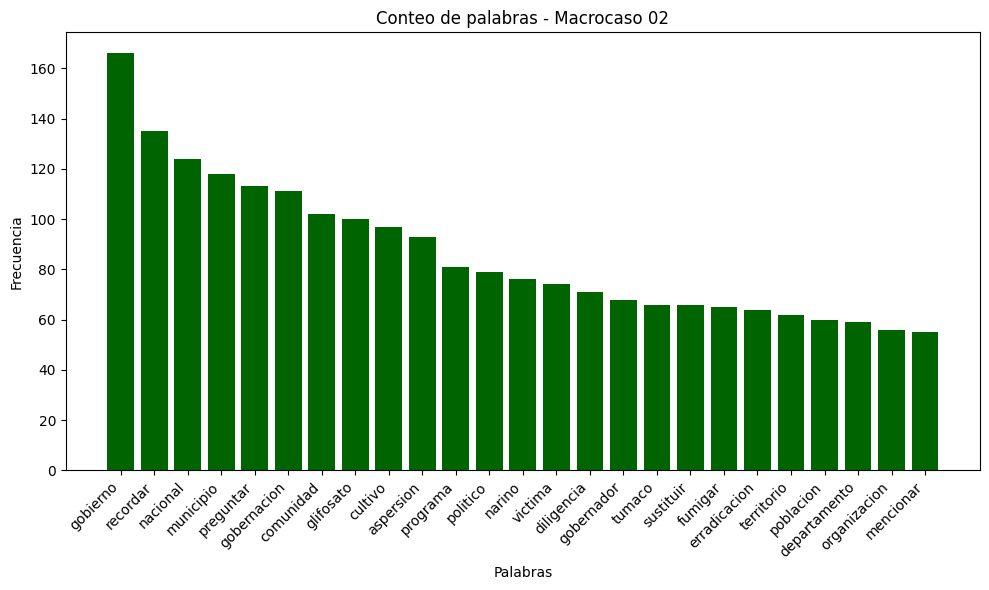

In [ ]:
tokens = nltk.word_tokenize(texto_sin_stopwords, language="spanish")
frecuencia_palabras = FreqDist(tokens)
palabras_repetidas = frecuencia_palabras.most_common(25)
palabras, frecuencias = zip(*palabras_repetidas)

plt.figure(figsize=(10, 6))
plt.bar(palabras, frecuencias, color="darkgreen")
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Conteo de palabras - Macrocaso 02')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
frecuencia_palabras = FreqDist(tokens)
palabras_repetidas = frecuencia_palabras.most_common(15)
tabla_frecuencias = pd.DataFrame(palabras_repetidas, columns=['Palabra', 'Frecuencia'])
print(tabla_frecuencias)

        Palabra  Frecuencia
0      gobierno         166
1      recordar         135
2      nacional         124
3     municipio         118
4     preguntar         113
5   gobernacion         111
6     comunidad         102
7     glifosato         100
8       cultivo          97
9     aspersion          93
10     programa          81
11     politico          79
12       narino          76
13      victima          74
14   diligencia          71


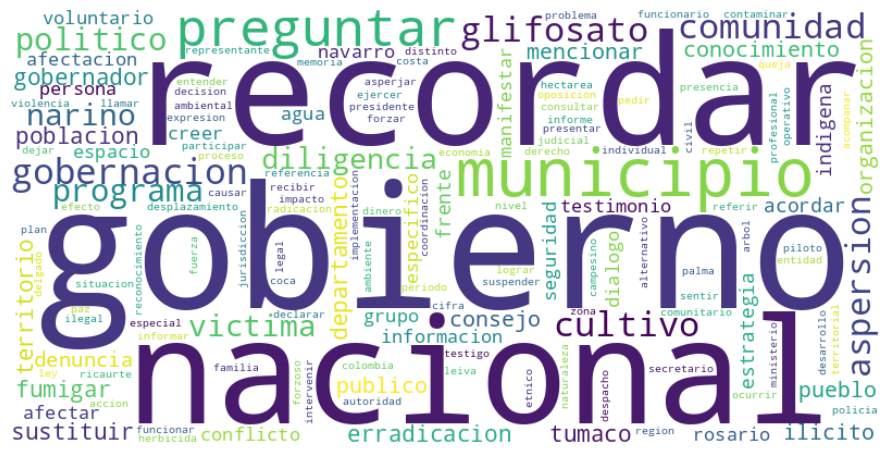

In [ ]:
# Crear distribución de frecuencia
frecuencia_palabras = FreqDist(tokens)

# Crear la nube de palabras
nube = WordCloud(width=800, height=400,
                 background_color='white',
                 #colormap='Dark2',
                 max_words=150).generate_from_frequencies(frecuencia_palabras)



plt.figure(figsize=(9, 5))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

# **Nube de palabras - Modelo sociabilidad**

In [ ]:
### Nube de palabras - modelo sociabilidad.
ruta_soc = "/Casos_JEP/Caso2_codigo/delta_vi.csv"
df_soc = pd.read_csv(ruta_soc)
df_soc = df_soc.rename(columns={"node_names....rownames.y.": "nodo"})
df_soc.head()

nodo  Delta_Est  CI95_Lower  CI95_Upper  Cluster  Order  \
0  significativo  -0.257728   -0.329047   -0.186408        3      1   
1      filiacion  -0.257726   -0.329046   -0.186407        3      2   
2   corresponder  -0.257472   -0.328791   -0.186152        3      3   
3      focalizar  -0.257470   -0.328790   -0.186151        3      4   
4       comentar  -0.257470   -0.328790   -0.186151        3      5   

  IntervalType  
0      Below 0  
1      Below 0  
2      Below 0  
3      Below 0  
4      Below 0

In [13]:
tabla_intervalos = (df_soc["IntervalType"].value_counts().reset_index())
tabla_intervalos.columns = ["IntervalType", "Frecuencia"]
tabla_intervalos["Proporcion"] = (
    tabla_intervalos["Frecuencia"] /
    tabla_intervalos["Frecuencia"].sum())
tabla_intervalos

IntervalType  Frecuencia  Proporcion
0      Below 0         410    0.548862
1      Above 0         200    0.267738
2   Contains 0         137    0.183400

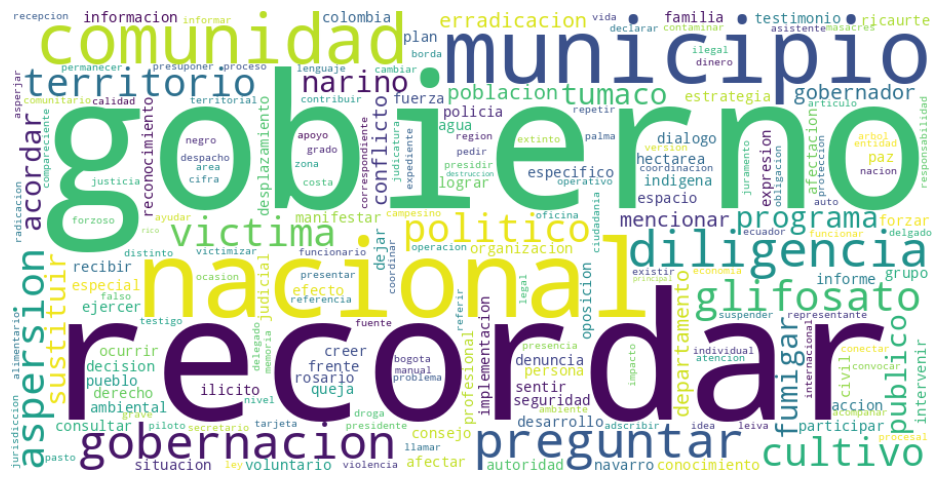

In [14]:
df_above = df_soc[df_soc["IntervalType"] == "Above 0"].copy()
frecuencias = (df_above.assign(peso=lambda d: d["Delta_Est"].abs()).set_index("nodo")["peso"]
    .to_dict())
wc = WordCloud(width=900,height=450,background_color="white",colormap="viridis",max_words=200)

wc.generate_from_frequencies(frecuencias)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
tabla_freq = (df_soc.groupby(["Cluster", "IntervalType"]).size().reset_index(name="Frecuencia"))
tabla_freq["Proporcion"] = (tabla_freq.groupby("Cluster")["Frecuencia"].transform(lambda x: x / x.sum()))
tabla_freq

Cluster IntervalType  Frecuencia  Proporcion
0        1      Above 0          20    0.285714
1        1   Contains 0          50    0.714286
2        2      Above 0          65    1.000000
3        3      Below 0         280    1.000000
4        4      Above 0          57    1.000000
5        5      Below 0         103    1.000000
6        6      Above 0          18    1.000000
7        7      Above 0          40    1.000000
8        8      Below 0          27    0.236842
9        8   Contains 0          87    0.763158

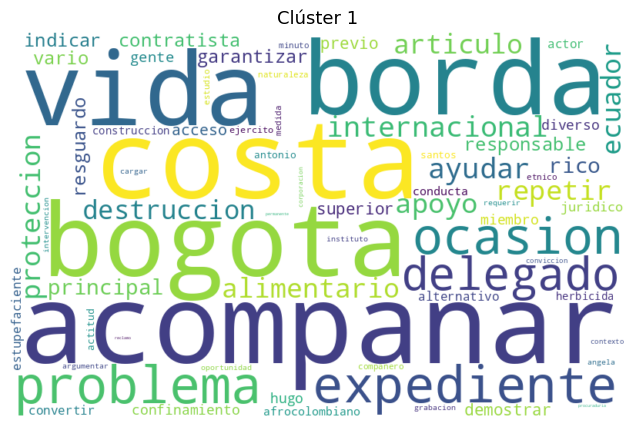

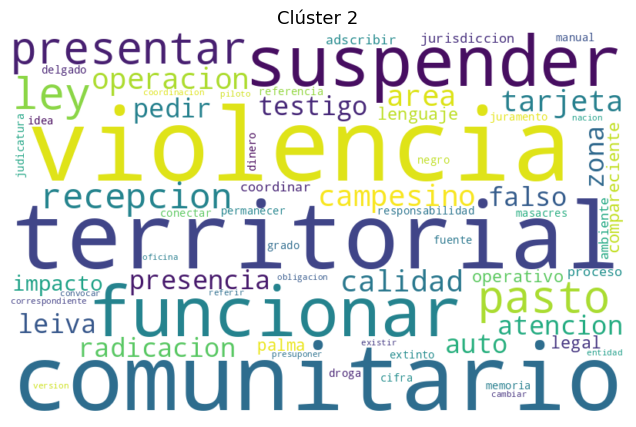

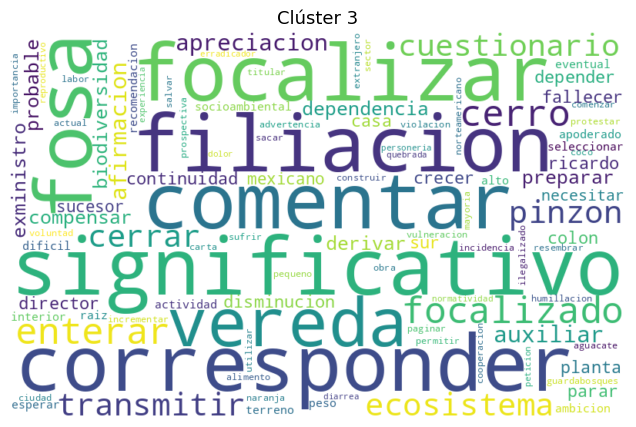

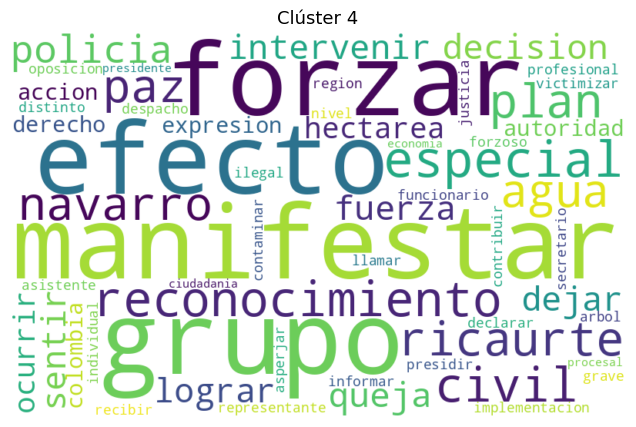

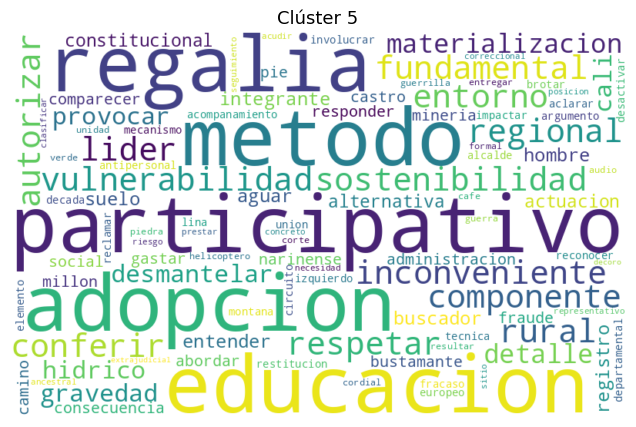

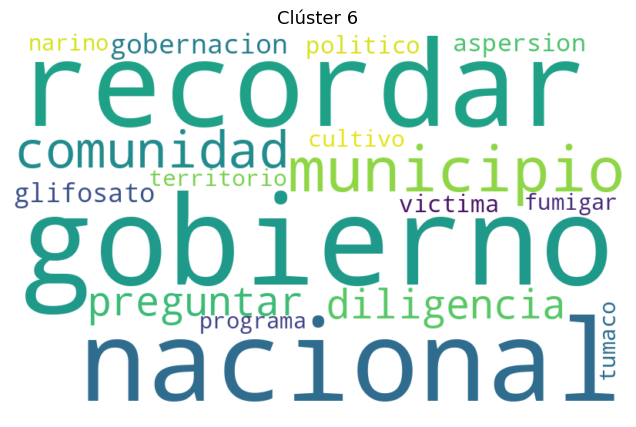

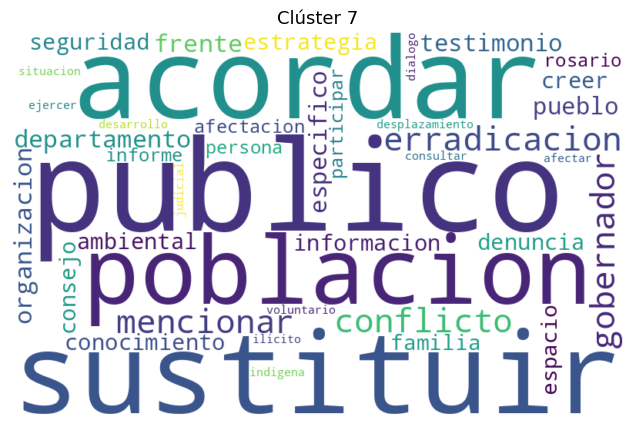

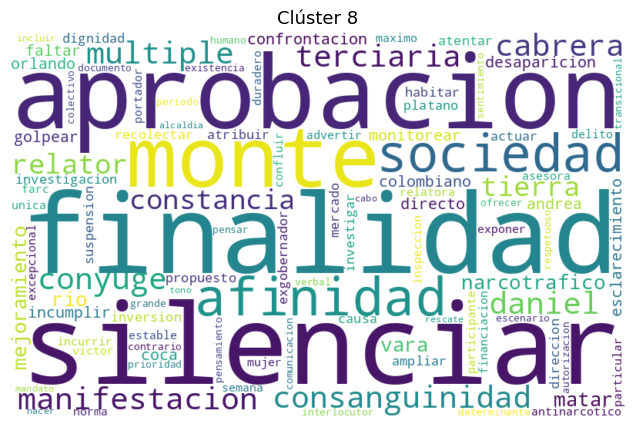

In [16]:
df_soc["peso_wc"] = df_soc["Delta_Est"].abs()
clusters = sorted(df_soc["Cluster"].unique())
for cl in clusters:

    df_cl = df_soc[df_soc["Cluster"] == cl]

    # Diccionario: palabra -> peso
    frec = dict(zip(df_cl["nodo"], df_cl["peso_wc"]))

    if len(frec) == 0:
        continue

    wc = WordCloud(
        width=800,
        height=500,
        background_color="white",
        max_words=100
    ).generate_from_frequencies(frec)

    plt.figure(figsize=(8, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Clúster {cl}", fontsize=13)
    plt.show()

In [ ]:
# @title
clusters = sorted(df_soc["cluster_label"].unique())

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for ax, cl in zip(axes, clusters):

    palabras = df_soc.loc[df_soc["cluster_label"] == cl, "Node"]

    # todas las palabras con frecuencia 1
    freq = {p: 1 for p in palabras}

    wc = WordCloud(
        width=600,
        height=600,
        background_color="white",
        prefer_horizontal=0.9,
        collocations=False
    ).generate_from_frequencies(freq)

    ax.imshow(wc, interpolation="bilinear")
    ax.set_title(cl, fontsize=14, pad=15)
    ax.axis("off")

plt.subplots_adjust(
    wspace=0.2,   # espacio horizontal
    hspace=0.3    # espacio vertical
)
plt.show()

# **ANÁLISIS DE SENTIMIENTO**

In [ ]:
ruta_excel = "/Casos_JEP/emociones.xlsx"
lexico = pd.read_excel(ruta_excel, engine="openpyxl")

# === 2. Normalizar el léxico ===
lexico = lexico.rename(columns={'Spanish Translation': 'Palabra'})

def limpiar_palabra(p):
    if pd.isna(p):
        return ""
    p = unidecode(str(p).lower().strip())
    p = re.sub(r'[^a-zñáéíóúü\s]', '', p)
    p = re.sub(r'\s+', ' ', p)
    return p
lexico['Palabra'] = lexico['Palabra'].apply(limpiar_palabra)

columnas_emociones = ['Positive','Negative','Anger','Anticipation',
    'Disgust','Fear','Joy','Sadness','Surprise','Trust']

lexico[columnas_emociones] = lexico[columnas_emociones].fillna(0).astype(int)
lexico = lexico.groupby('Palabra', as_index=False)[columnas_emociones].max()
emociones = lexico.set_index('Palabra').to_dict(orient='index')

tokens = [limpiar_palabra(t) for t in word_tokenize(texto_sin_stopwords)]

conteo = Counter({emo: 0 for emo in columnas_emociones})

for token in tokens:
    if token in emociones:
        for emo, valor in emociones[token].items():
            conteo[emo] += valor

df_emociones = pd.DataFrame([conteo])
df_emociones.insert(0, 'Texto', 'audiencias')

# Traducir
traducciones = { 'Positive': 'Positivo', 'Negative': 'Negativo', 'Anger': 'Ira', 'Anticipation': 'Anticipación',
    'Disgust': 'Disgusto', 'Fear': 'Miedo', 'Joy': 'Alegría', 'Sadness': 'Tristeza', 'Surprise': 'Sorpresa',
    'Trust': 'Confianza'}

df_emociones = df_emociones.rename(columns=traducciones)
print(df_emociones)


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


        Texto  Positivo  Negativo  Ira  Anticipación  Disgusto  Miedo  \
0  audiencias      1911      1054  608           546       386    830   

   Alegría  Tristeza  Sorpresa  Confianza  
0      333       384       225       1207  


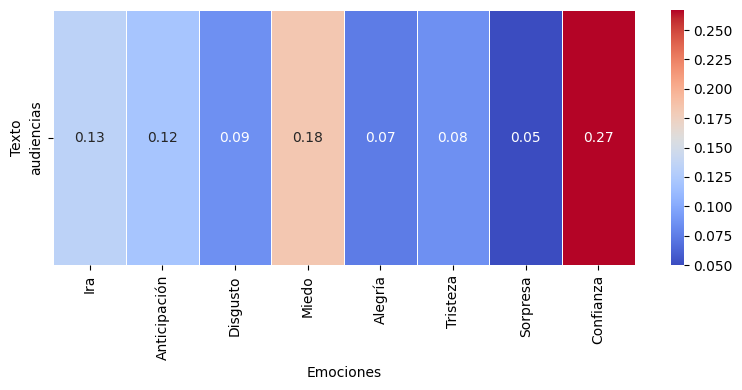

In [ ]:
columnas_emociones = ["Ira" , "Anticipación" , "Disgusto" ,  "Miedo",  "Alegría" , "Tristeza" , "Sorpresa", "Confianza"]
df_heatmap = df_emociones[['Texto'] + columnas_emociones].copy()
df_heatmap.set_index('Texto', inplace=True)
df_heatmap_norm = df_heatmap.div(df_heatmap.sum(axis=1), axis=0)
plt.figure(figsize=(8, 4))
sns.heatmap(df_heatmap_norm, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.xlabel('Emociones')
plt.ylabel('Texto')
plt.tight_layout()
plt.show()


# **RED BASICA**

In [19]:
todas_las_palabras = [palabra for bigrama in skipgramas_limpio for palabra in bigrama]
palabras_unicas = set(todas_las_palabras)
print(f"Número de palabras únicas: {len(palabras_unicas)}")

Número de palabras únicas: 756


In [20]:
G = nx.Graph()
for palabra1, palabra2 in skipgramas_limpio:
    G.add_edge(palabra1, palabra2)
nodo22 = list(G.edges())
len(nodo22)
print("Nodos en el grafo:", len(G.nodes))

Nodos en el grafo: 756


In [21]:
# Componentes conexas:
componentes = sorted(nx.connected_components(G), key=len, reverse=True)
componente_gigante = componentes[0]
G_gigante = G.subgraph(componente_gigante).copy()

print("Nodos en componente gigante:", G_gigante.number_of_nodes())
print("Aristas en componente gigante:", G_gigante.number_of_edges())


Nodos en componente gigante: 747
Aristas en componente gigante: 3732


In [ ]:
A = nx.to_pandas_adjacency(G_gigante, dtype=int)
#Metricas
A = nx.to_pandas_adjacency(G_gigante, dtype=int)
n = G_gigante.number_of_nodes()
m = G_gigante.number_of_edges()

grado_medio = np.mean([d for _, d in G_gigante.degree()])
grado_max = max(dict(G_gigante.degree()).values())
densidad = nx.density(G_gigante)

diametro = nx.diameter(G_gigante)
long_camino_prom = nx.average_shortest_path_length(G_gigante)

transitividad = nx.transitivity(G_gigante)
asortatividad = nx.degree_assortativity_coefficient(G_gigante)



In [ ]:
centralidad_grado = nx.degree_centrality(G_gigante)
centralidad_intermediacion = nx.betweenness_centrality(G_gigante)
centralidad_cercania = nx.closeness_centrality(G_gigante)

In [ ]:
resumen = pd.DataFrame({
    "Métrica": [ "Número de nodos","Número de aristas","Grado medio","Grado máximo","Densidad",
        "Diámetro","Longitud media del camino","Transitividad","Asortatividad"],
    "Valor": [n,m, grado_medio,grado_max,densidad,diametro,long_camino_prom,transitividad,asortatividad]})
resumen


Métrica        Valor
0            Número de nodos   747.000000
1          Número de aristas  3732.000000
2                Grado medio     9.991968
3               Grado máximo   151.000000
4                   Densidad     0.013394
5                   Diámetro     6.000000
6  Longitud media del camino     3.045795
7              Transitividad     0.189255
8              Asortatividad    -0.081815

In [ ]:
# Calcular grado de cada nodo
grados = dict(G_gigante.degree())
df_grados = (
    pd.DataFrame(grados.items(), columns=["termino", "grado"])
    .sort_values("grado", ascending=False)
    .reset_index(drop=True))
top_grado = df_grados.head(10)
top_grado

termino  grado
0     gobierno    151
1     recordar    127
2     nacional    104
3    municipio    103
4  gobernacion    101
5    comunidad    101
6    preguntar    100
7   diligencia     97
8    glifosato     92
9    aspersion     81

In [ ]:
# CENTRALIDAD


# Extraer la componente gigante
componentes = list(nx.connected_components(G))
componente_gigante = max(componentes, key=len)
G_gigante = G.subgraph(componente_gigante).copy()

print("Nodos en la componente gigante:", G_gigante.number_of_nodes())
print("Aristas en la componente gigante:", G_gigante.number_of_edges())

num_nodos = G_gigante.number_of_nodes()
num_aristas = G_gigante.number_of_edges()
grados = dict(G_gigante.degree())

# CENTRALIDAD

# Betweenness (aproximada si la red es grande)
betweenness = nx.betweenness_centrality( G_gigante, k=min(500, num_nodos), normalized=True, seed=42)

# Closeness
closeness = nx.closeness_centrality(G_gigante)

# Eigenvector
eigenvector = nx.eigenvector_centrality( G_gigante, max_iter=1000, tol=1e-6)
df_centralidad = pd.DataFrame({
    "termino": list(G_gigante.nodes()),
    "grado": [grados[n] for n in G_gigante.nodes()],
    "betweenness": [betweenness[n] for n in G_gigante.nodes()],
    "closeness": [closeness[n] for n in G_gigante.nodes()],
    "eigenvector": [eigenvector[n] for n in G_gigante.nodes()]
})


# TOP 10 POR CADA MÉTRICA


top10_grado = df_centralidad.sort_values("grado", ascending=False).head(10)
top10_betweenness = df_centralidad.sort_values("betweenness", ascending=False).head(10)
top10_closeness = df_centralidad.sort_values("closeness", ascending=False).head(10)
top10_eigenvector = df_centralidad.sort_values("eigenvector", ascending=False).head(10)

print("\n===== TOP 10 POR GRADO =====")
print(top10_grado)

print("\n===== TOP 10 POR BETWEENNESS =====")
print(top10_betweenness)

print("\n===== TOP 10 POR CLOSENESS =====")
print(top10_closeness)

print("\n===== TOP 10 POR EIGENVECTOR =====")
print(top10_eigenvector)

Nodos en la componente gigante: 747
Aristas en la componente gigante: 3732

===== TOP 10 POR GRADO =====
         termino  grado  betweenness  closeness  eigenvector
162     gobierno    151     0.112580   0.509563     0.237849
305     recordar    127     0.085753   0.509911     0.223348
126     nacional    104     0.043291   0.474857     0.188490
98     municipio    103     0.072039   0.485993     0.177841
312  gobernacion    101     0.041826   0.472750     0.196692
268    comunidad    101     0.071705   0.471853     0.175146
294    preguntar    100     0.073767   0.488540     0.172732
6     diligencia     97     0.096674   0.442467     0.078803
244    glifosato     92     0.043846   0.470662     0.171409
243    aspersion     81     0.035432   0.467712     0.164088

===== TOP 10 POR BETWEENNESS =====
         termino  grado  betweenness  closeness  eigenvector
162     gobierno    151     0.112580   0.509563     0.237849
6     diligencia     97     0.096674   0.442467     0.078803
305  

/tmp/ipython-input-2132023530.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", n_clusters)


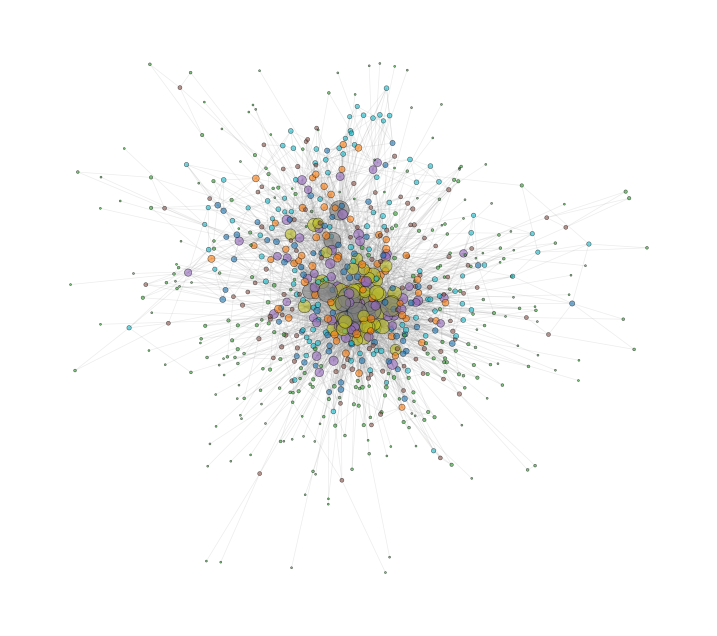

In [ ]:
##grafico clusteres modelo de sociabilidad
cluster_por_nodo = (df_soc.set_index("nodo")["Cluster"].to_dict())
cluster_gigante = {n: cluster_por_nodo[n]for n in G_gigante.nodes()if n in cluster_por_nodo}

clusters_unicos = sorted(set(cluster_gigante.values()))
n_clusters = len(clusters_unicos)
cmap = plt.cm.get_cmap("tab10", n_clusters)
color_por_cluster = { cl: cmap(i) for i, cl in enumerate(clusters_unicos)}
colores_nodos = [
    color_por_cluster[cluster_gigante[n]]
    for n in G_gigante.nodes()
    if n in cluster_gigante]

tamanos_nodos = [ G_gigante.degree(n) * 2 for n in G_gigante.nodes() if n in cluster_gigante]
pos = nx.spring_layout(G_gigante, seed=123, k=0.6)
plt.figure(figsize=(9, 8))
nx.draw_networkx_nodes( G_gigante,pos,node_color=colores_nodos,node_size=tamanos_nodos,alpha=0.6,edgecolors="black",linewidths=0.4)
nx.draw_networkx_edges(G_gigante, pos,alpha=0.15,width=0.5,edge_color="gray")
plt.axis("off")
plt.show()


/tmp/ipython-input-2219874747.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", n_clusters)


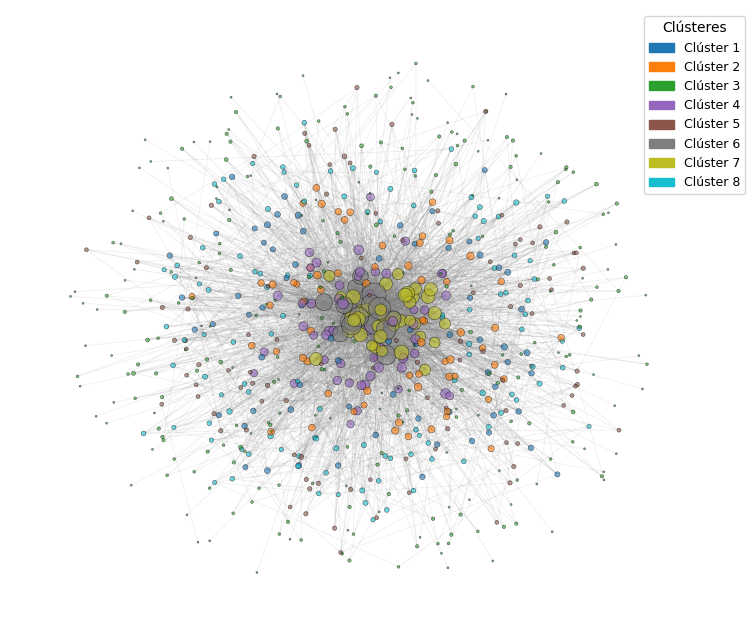

In [24]:
import matplotlib.patches as mpatches
##gráfico mas amplio y con la leyenda de los clusteres::

cluster_por_nodo = df_soc.set_index("nodo")["Cluster"].to_dict()
cluster_gigante = {n: cluster_por_nodo[n] for n in G_gigante.nodes() if n in cluster_por_nodo}

clusters_unicos = sorted(set(cluster_gigante.values()))
n_clusters = len(clusters_unicos)

cmap = plt.cm.get_cmap("tab10", n_clusters)
color_por_cluster = {cl: cmap(i) for i, cl in enumerate(clusters_unicos)}
colores_nodos = [color_por_cluster[cluster_gigante[n]] for n in G_gigante.nodes() if n in cluster_gigante]

tamanos_nodos = [G_gigante.degree(n) * 2 for n in G_gigante.nodes() if n in cluster_gigante]

pos = nx.spring_layout(G_gigante, seed=123, k=10000000000)
plt.figure(figsize=(9, 8))
nx.draw_networkx_nodes(G_gigante,pos,node_color=colores_nodos,node_size=tamanos_nodos,alpha=0.6,edgecolors="black",linewidths=0.4)
nx.draw_networkx_edges(G_gigante,pos,alpha=0.15,width=0.5,edge_color="gray")
handles = [mpatches.Patch(color=color_por_cluster[cl], label=f"Clúster {cl}") for cl in clusters_unicos]
plt.legend(handles=handles,title="Clústeres",loc="upper left",bbox_to_anchor=(0.9, 1),fontsize=9,title_fontsize=10,frameon=True)
plt.axis("off")
plt.show()


In [ ]:
##Descargar matriz adj
ruta_salida = "matriz_adyacencia_componente_gigante.csv"
A.to_csv(ruta_salida)
files.download(ruta_salida)
